# Code for BB84  protocol

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
import string
import os
# %%matpotlib inline
#Function for assigning Standard (s) or Hadamard (h) measurement basis
def randomString(stringLength=2):
    """Generate a random string of fixed length """
    basis = 'sh'
    return ''.join(random.choice(basis) for i in range(stringLength))

#Function for executing the BB84 protocol using n qubits and N check-bits
def BB84(n,N,Strings=False):
    """Doctrings
    BB84(n,N)
    
    n: Number of bits to be used for the key
    
    N: Number of bits to be checked
    
    Stings: Default False. If True, return Alice's , Bob's and Eve's :
    1- initial bit strings
    2- keys
    3- initial basis used
    4- check bit sequence
    --------
    Returns
    
    R: A list of strings of "OK" and "ABORT" that indicate when Eve has been detected
       the amount of the OK's and Abort's will tell you the percentage of discovering Eve for one simulation
       
    a=[]  #Alice's bitstring
    b=[]  #Bob's bitstring
    e=[]  #Eve's bitstring
    x=[]  #Alice's key
    y=[]  #Bob's key
    z=[]  #Eve's key
    
    aa=[] Alice's s-h assignment
    bb=[] Bob's s-h assignment
    ee=[] Eve's s-h assignment
    
     xx=[] #Alice's check-bits sequence
     yy=[] #Bob's check-bits sequence
    
    R=[]  #Results of Eve's detection
    
    
    """
    a=[]  #Alice's bitstring
    b=[]  #Bob's bitstring
    e=[]  #Eve's bitstring
    x=[]  #Alice's key
    y=[]  #Bob's key
    z=[]  #Eve's key
    
    aa=randomString(n)  #Alice's s-h assignment
    bb=randomString(n)  #Bob's s-h assignment
    ee=randomString(n)  #Eve's s-h assignment

    #Generate a,b,e and x,y,z
    for i in range(n):
        a.append(random.randint(0,1))
        if ee[i]==aa[i]:
            e.append(a[i])
        else:
            e.append(random.randint(0,1))
        if bb[i]==ee[i]:
            b.append(e[i])
        else:
            b.append(random.randint(0,1))
        if aa[i]==bb[i]:
            x.append(a[i])
            y.append(b[i])
            z.append(e[i])

    R=[]  #Results of Eve's detection

    for j in N:
        s=random.sample(range(len(x)),j)  #Choice of check-bits
        xx=[] #Alice's check-bits sequence
        yy=[] #Bob's check-bits sequence
        for i in range(j):  #Generate xx,yy
            xx.append(x[s[i]])
            yy.append(y[s[i]])
        if xx!=yy:  #Check for Eve's presence
            R.append('ABORT')  #Eve detected
        else:
            R.append('OK')     #Eve not detected
    if Strings==False:
        return R
    if Strings==True:
        return a,b,e,aa,bb,ee,x,y,z,xx,yy,s,R

# One instance of BB84

In [2]:
a,b,e,aa,bb,ee,x,y,z,xx,yy,s,R=BB84(128,range(3),Strings=True)
  # if s[0]>60:
print("Alice's Check sequence: ",xx)
print("Bob's Check sequence:   ",yy)
print('qubits checked are # :  ',s)
print("Result of Simulation: ",R[-1])

Alice's Check sequence:  [1, 0]
Bob's Check sequence:    [0, 0]
qubits checked are # :   [54, 21]
Result of Simulation:  ABORT


In [3]:
for i in range(2000):
  a,b,e,aa,bb,ee,x,y,z,xx,yy,s,R=BB84(128,range(3),Strings=True)
  if s[1]>70:
    print("Alice's Check sequence: ",xx)
    print("Bob's Check sequence:   ",yy)
    print('qubits checked are # :  ',s)
    print("Result of Simulation: ",R[-1])

Alice's Check sequence:  [1, 0]
Bob's Check sequence:    [1, 0]
qubits checked are # :   [24, 72]
Result of Simulation:  OK
Alice's Check sequence:  [1, 0]
Bob's Check sequence:    [1, 0]
qubits checked are # :   [16, 77]
Result of Simulation:  OK
Alice's Check sequence:  [1, 0]
Bob's Check sequence:    [1, 0]
qubits checked are # :   [53, 77]
Result of Simulation:  OK
Alice's Check sequence:  [0, 0]
Bob's Check sequence:    [1, 0]
qubits checked are # :   [64, 76]
Result of Simulation:  ABORT
Alice's Check sequence:  [0, 0]
Bob's Check sequence:    [0, 1]
qubits checked are # :   [17, 71]
Result of Simulation:  ABORT
Alice's Check sequence:  [1, 1]
Bob's Check sequence:    [1, 1]
qubits checked are # :   [12, 71]
Result of Simulation:  OK
Alice's Check sequence:  [1, 1]
Bob's Check sequence:    [1, 1]
qubits checked are # :   [22, 75]
Result of Simulation:  OK


In [4]:
print("Alice's keys: ",x)
print("Bobs's keys: ",y)
print("Eve's keys: ",z)
print("Alice's Basis: ",aa)
print("Bobs's Basis: ",bb)
print("Eve's Basis: ",ee)

Alice's keys:  [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
Bobs's keys:  [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
Eve's keys:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1]
Alice's Basis:  shhhshshhshhsshhhhshhssshhhsssshssssshshshhsshhhhshhhssssshhhsshshshhssshsshssshhhshhsssssssshssshhssshhsshshsshshhsshshhhhhshhh
Bobs's Basis:  hhshhhhshsshhhshsshsshshhsshhhhhshsshssshhhssshsshsshsshhshhhsshshhssshsshhsshhhhsshsshshhsshhhhssshhhshshhshsssssshhshshshhshhs
Eve's Basis:  hshhhshshhhhsssshshhhhssshhhhhhhshssshhhssssshssshhhshshshsshsshshhhssshshshsshshsshhhsshhhsssshhsshhhhhssssshssshhhhhsshhhshhsh


# Simulation of the BB84 protocol

In [123]:
k=450 #Number of iterations of BB84
n=128 #Number of qubits
N=np.arange(1,16) #Number of check-bits

dist=np.empty([k,len(N)]) #Probability distribution

#Generate dist,avrg
for j in range(k):  #Loop for generating dist
  abort=np.zeros(len(N),int) #Number of ABORT
  for i in range(k):  #Loop for executing BB84
    R=BB84(n,N)
    for m in range(len(R)): #Loop for each N
      if R[m]=='ABORT': #Check for ABORT results
        abort[m]+=1
    pabort=abort/k  #Experimental probability of ABORT
  dist[j]=pabort
avrg=np.mean(dist,axis=0) #Average of each column of dist

In [124]:
dist

array([[0.24666667, 0.42222222, 0.52666667, ..., 0.98888889, 0.97777778,
        0.98444444],
       [0.23111111, 0.44      , 0.58222222, ..., 0.98888889, 0.97777778,
        0.98444444],
       [0.25111111, 0.43111111, 0.56888889, ..., 0.97333333, 0.98888889,
        0.99333333],
       ...,
       [0.23111111, 0.44      , 0.57111111, ..., 0.98666667, 0.98444444,
        0.98      ],
       [0.27777778, 0.44444444, 0.56444444, ..., 0.97777778, 0.98222222,
        0.99333333],
       [0.24222222, 0.43111111, 0.58666667, ..., 0.97333333, 0.97555556,
        0.97555556]])

In [125]:
avrg

array([0.24892346, 0.43518519, 0.57701728, 0.68307654, 0.76252346,
       0.82045926, 0.86599506, 0.90042469, 0.92443457, 0.94352099,
       0.95687901, 0.96782222, 0.9761679 , 0.98192593, 0.98650864])

# Now we use Matplotlib's hist function to draw a distribution 

and see what is the average value of finding Eve for the given parameters.



## For one plot

plots_BB84 already exits!


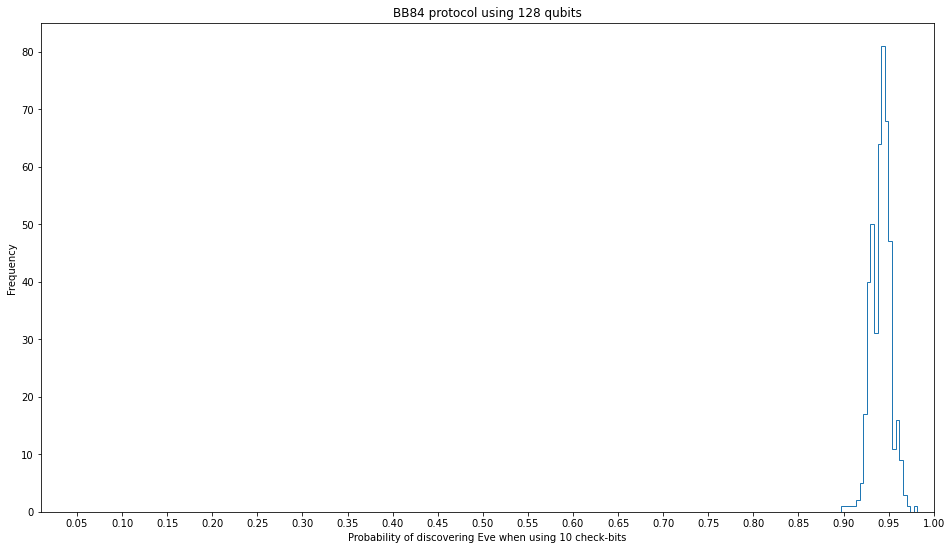

In [126]:
#Where to store the plots
outpath='plots_BB84'

#Check if folder exists
if outpath not in os.listdir():
    os.mkdir(outpath)
else: 
    print(outpath,'already exits!')

#How many qubits to inspect
qb=10

#Configuration for the plots
start = 0
stop  = 1
step  = .05
bins=np.linspace(start, stop, num=250)
    
    
#Making 1 single plot
#Specifing qb changes the plot
plt.figure(num=qb,figsize=(16,9),)
count,val,_=plt.hist(dist[:,qb-1],bins=bins,align='left',histtype='step' )
# Min,Max=val[0],val[-1]
# ticks=np.arange(Min,Max,step=.01)
# ll=['%.3f' %a for a in val]
plt.xticks(np.arange(start, stop+step, step))
# plt.xticks(ticks=val[::18],labels=ll[::18])
plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb-1])
plt.ylabel('Frequency')
plt.xlim(0.01,1.0)
plt.title('BB84 protocol using %i qubits'%n)
plt.savefig(outpath+'/'+'BB84-dist with %i check-bits'%N[qb-1],dpi=200)
plt.show()
plt.close()


## For all plots individually

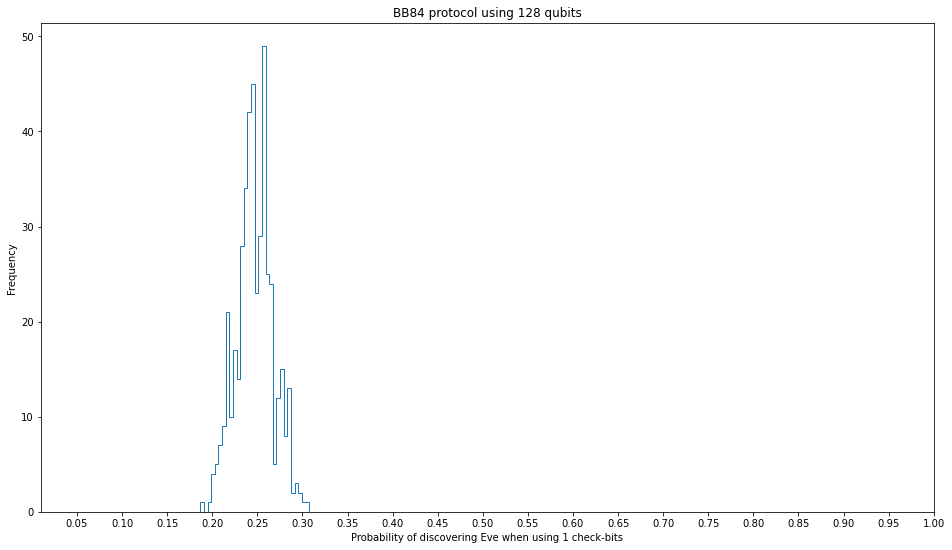

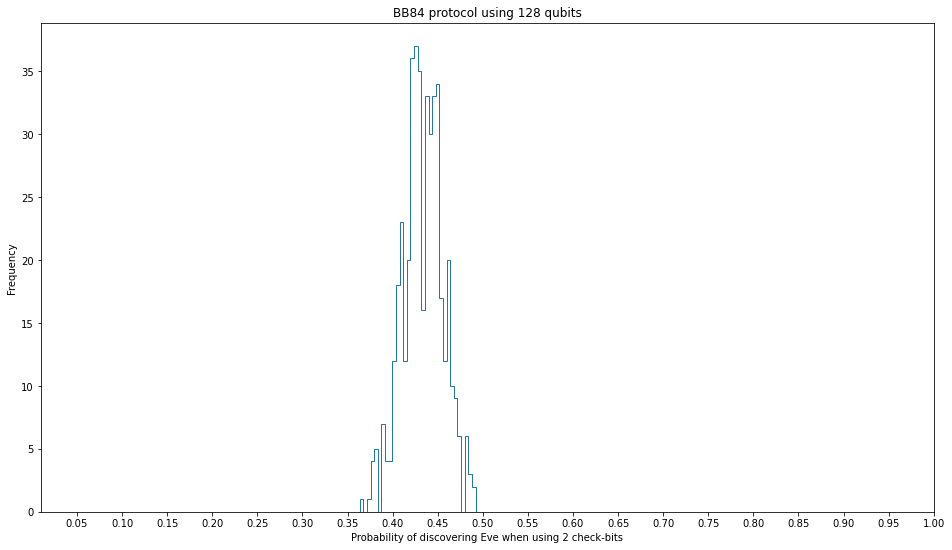

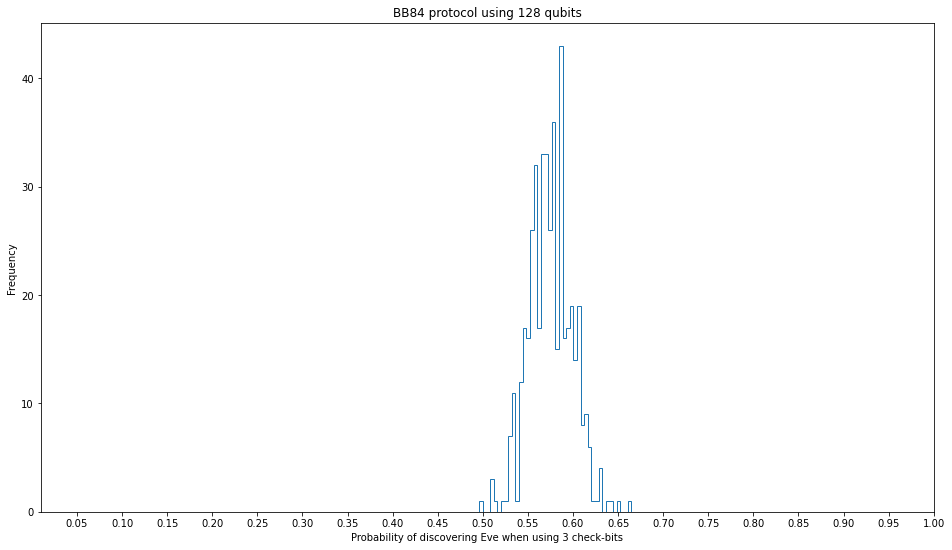

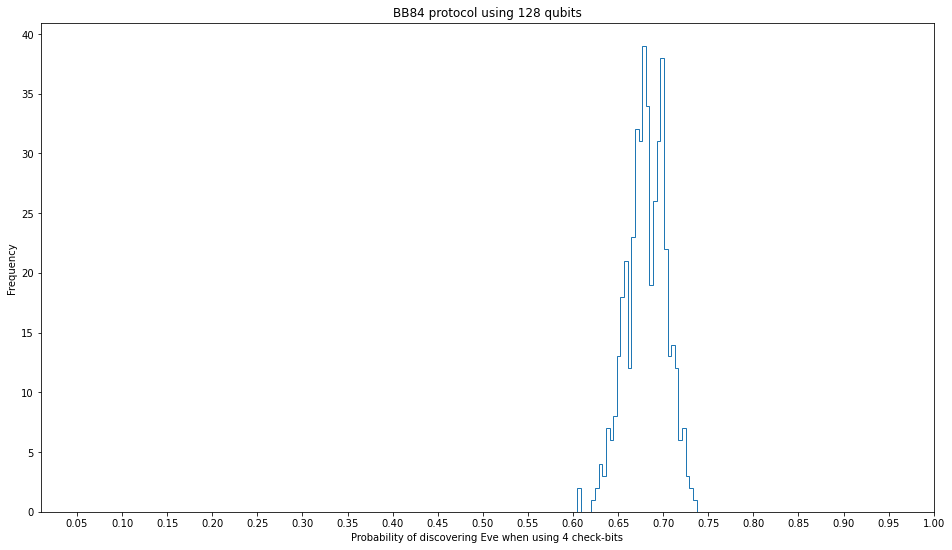

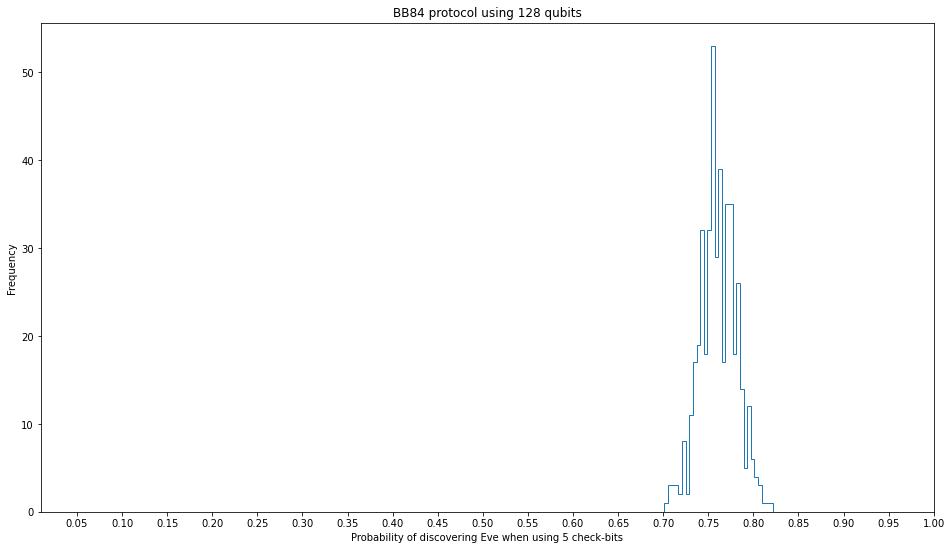

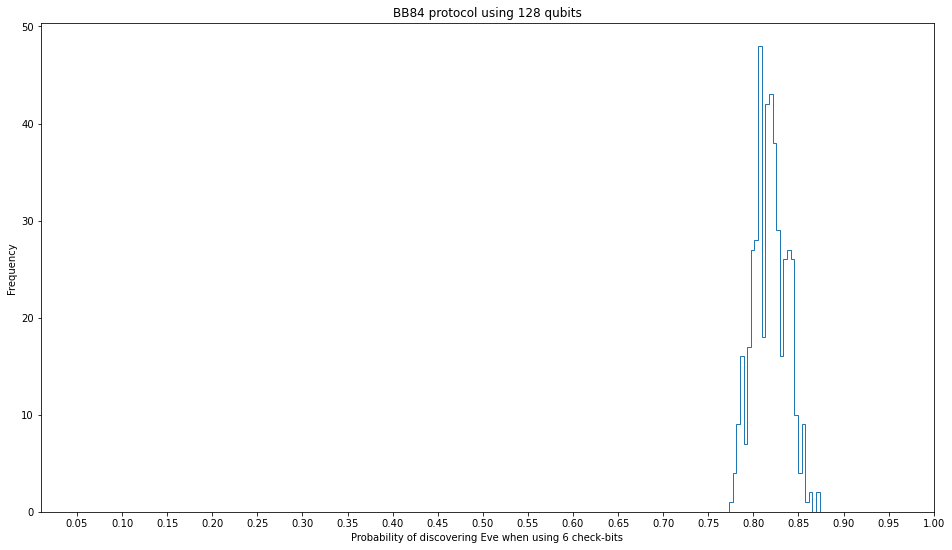

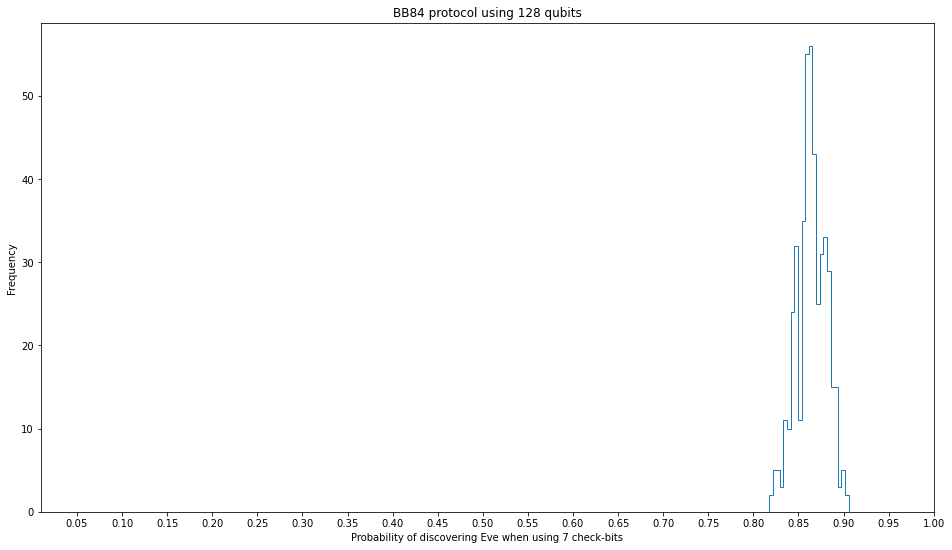

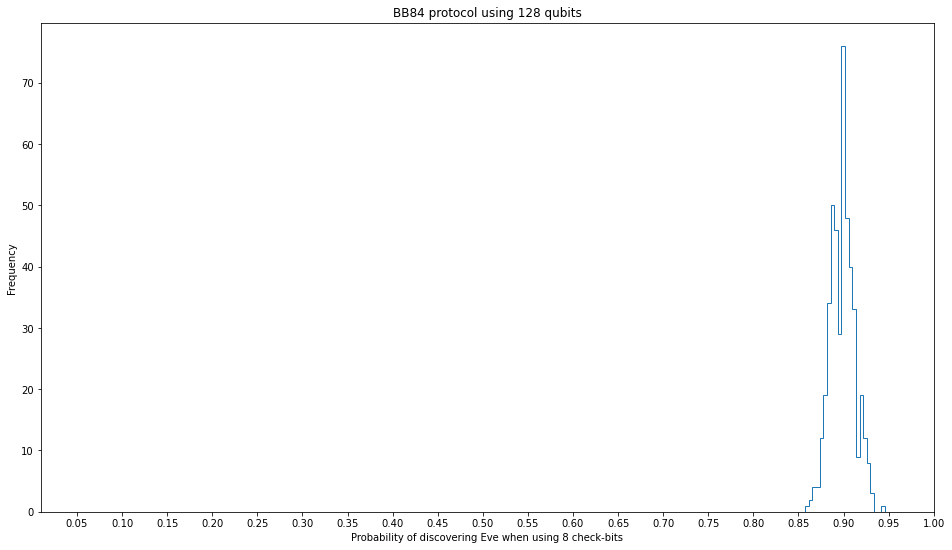

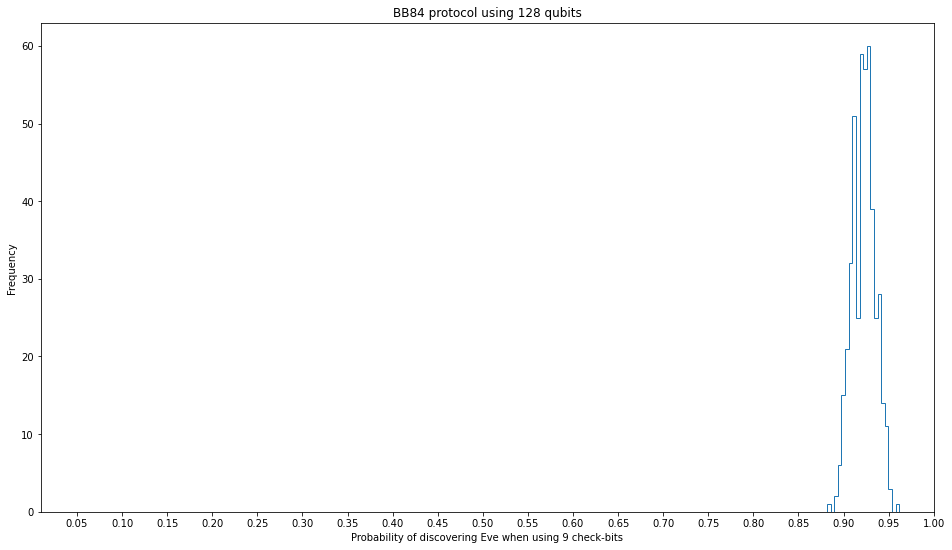

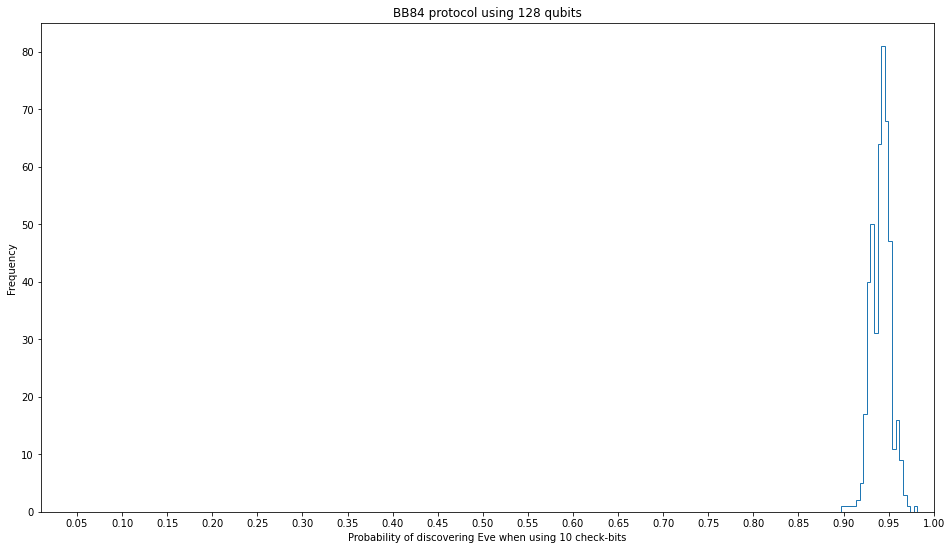

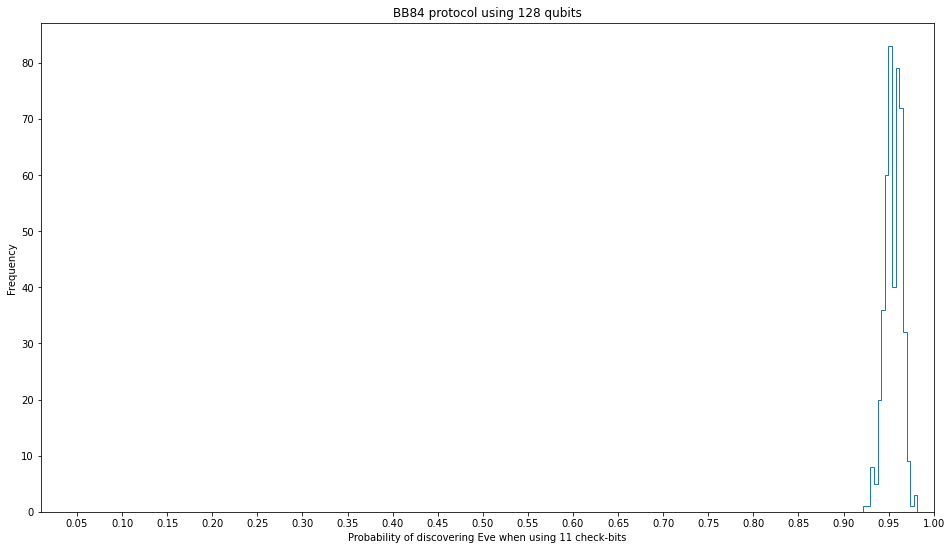

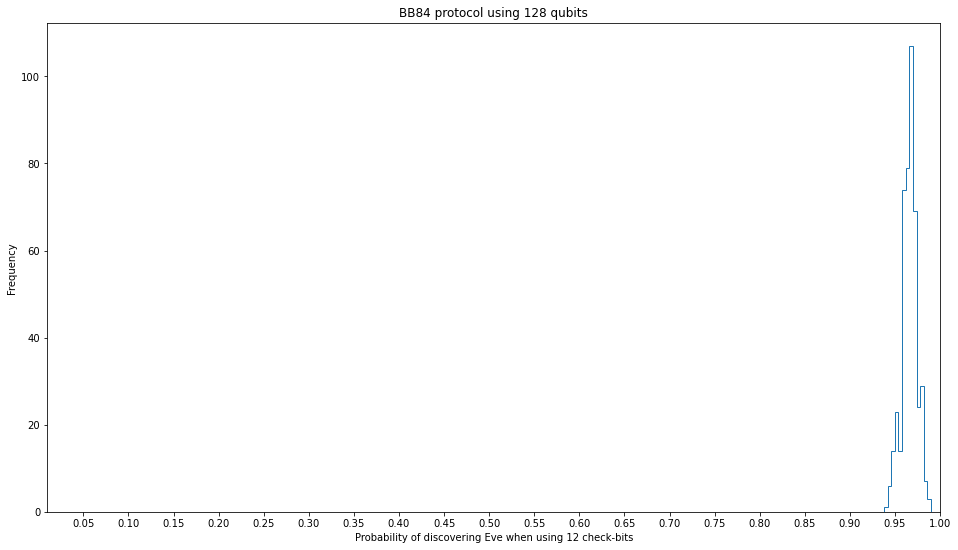

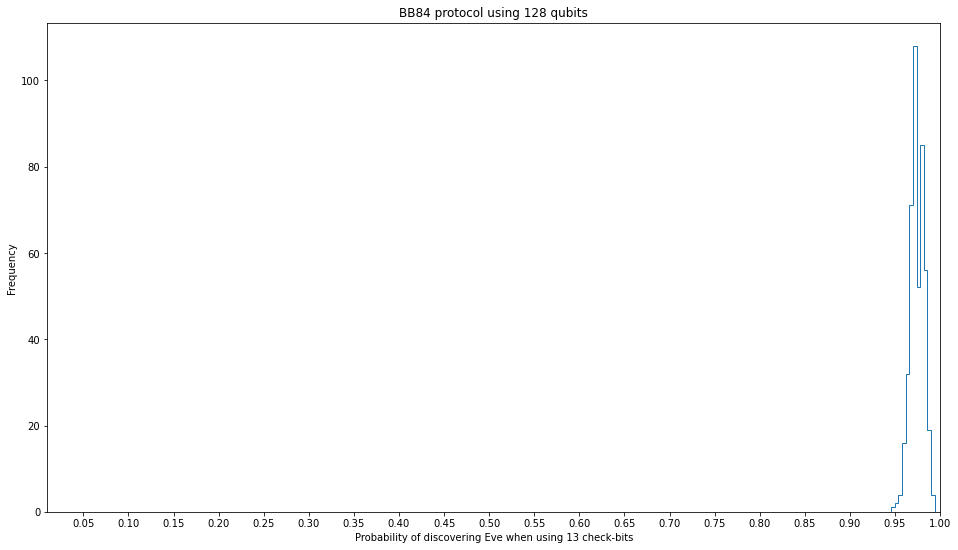

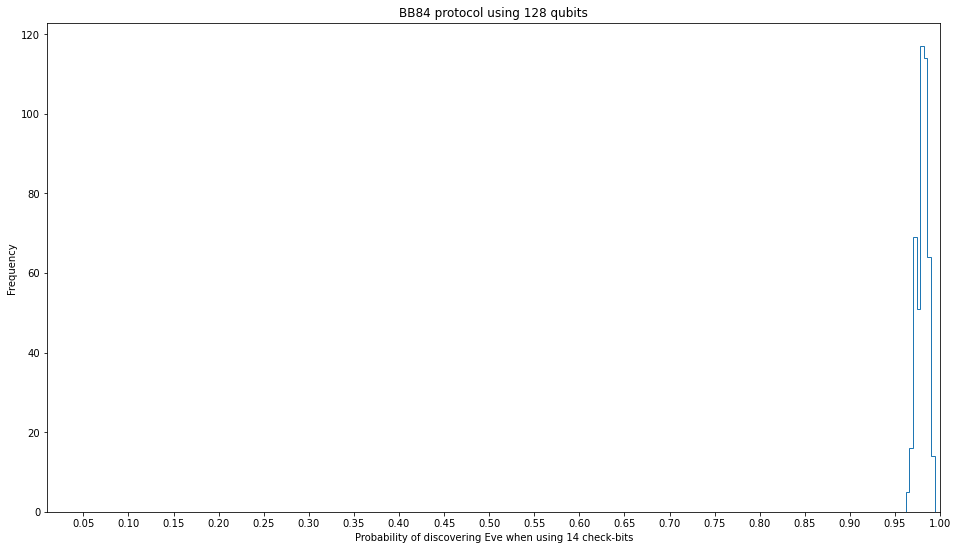

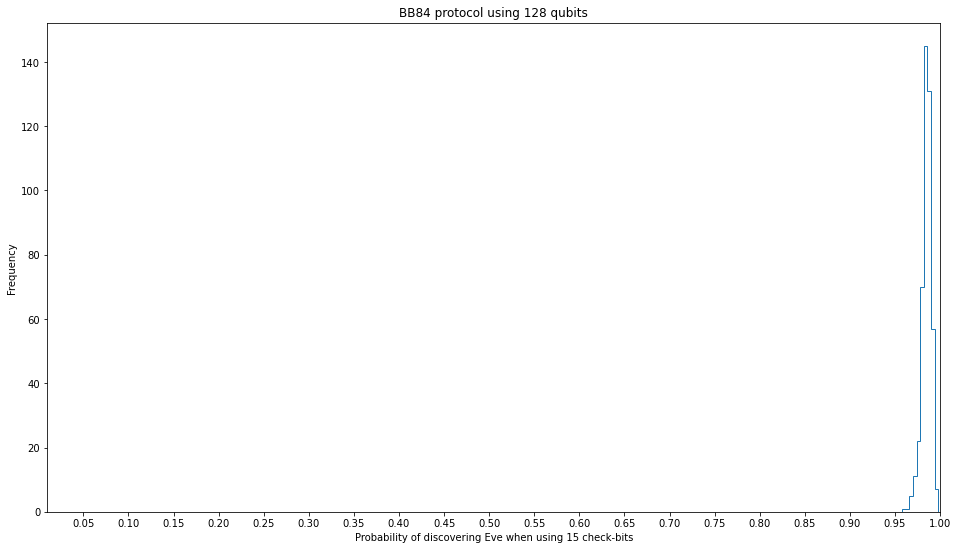

In [127]:
for qb in range(len(N)):
    count,val=[],[]
    plt.figure(num=qb,figsize=(16,9))
    count,val,_=plt.hist(dist[:,qb],bins=bins,align='left',histtype='step' )
    plt.xticks(np.arange(start, stop+step, step))
    plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb])
    plt.ylabel('Frequency')
    plt.xlim(0.01,1.0)
    plt.title('BB84 protocol using %i qubits'%n)
    plt.savefig(outpath+'/'+'BB84-dist with %i check-bits'%N[qb],dpi=500)
    plt.show()
    plt.close()

## A Closer look

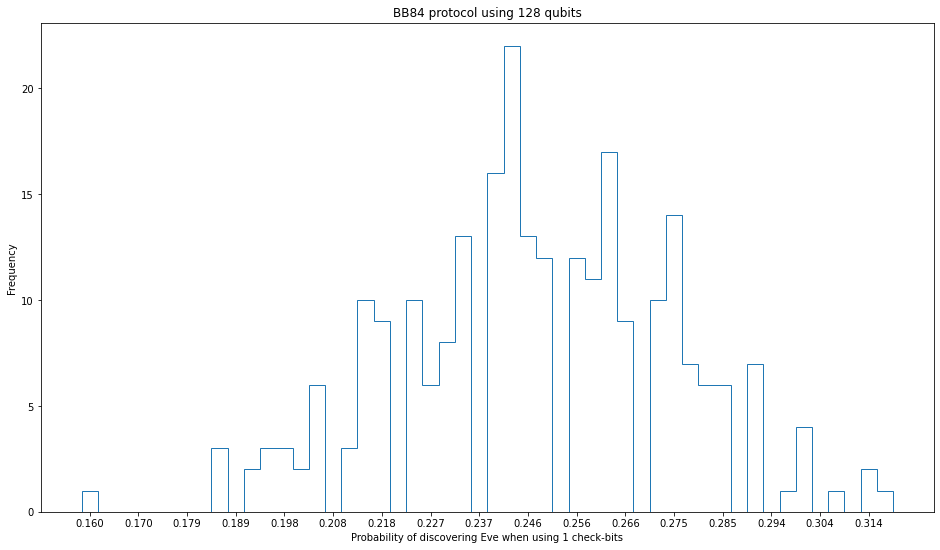

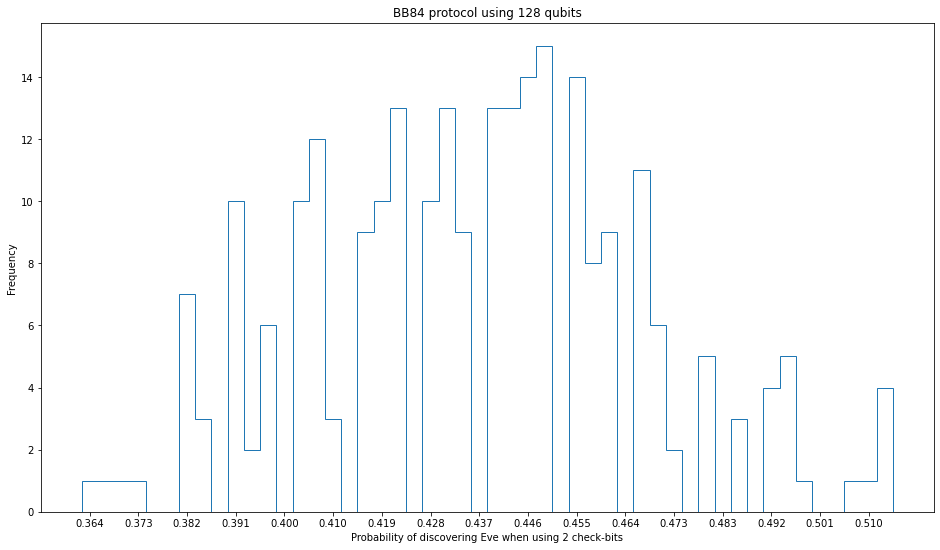

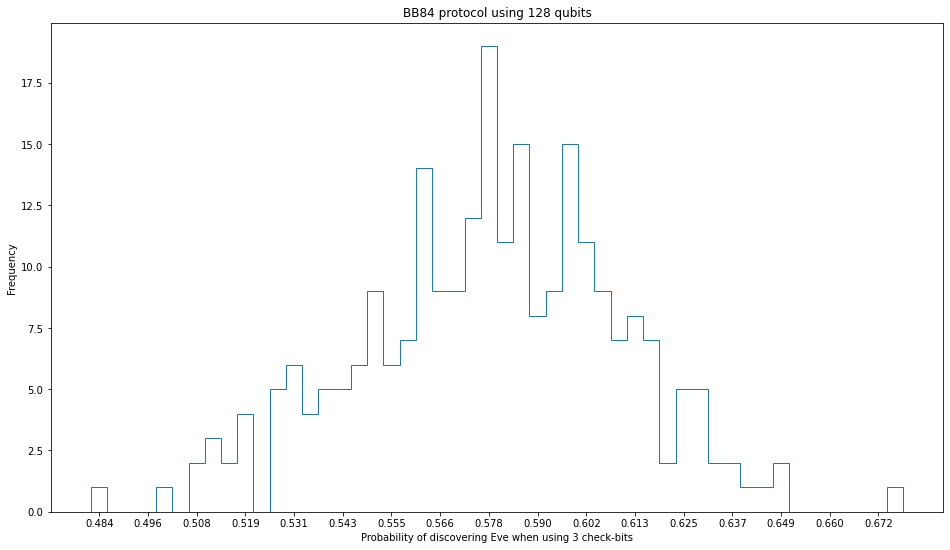

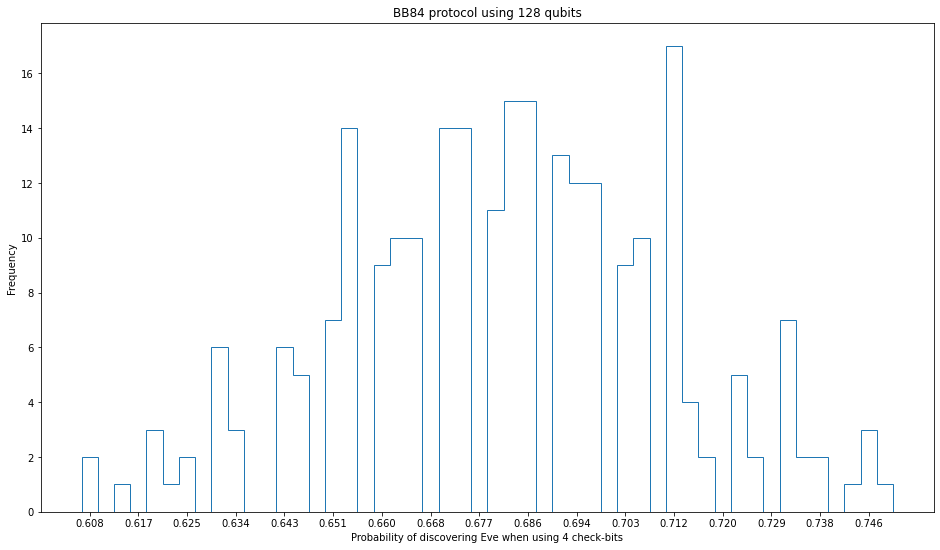

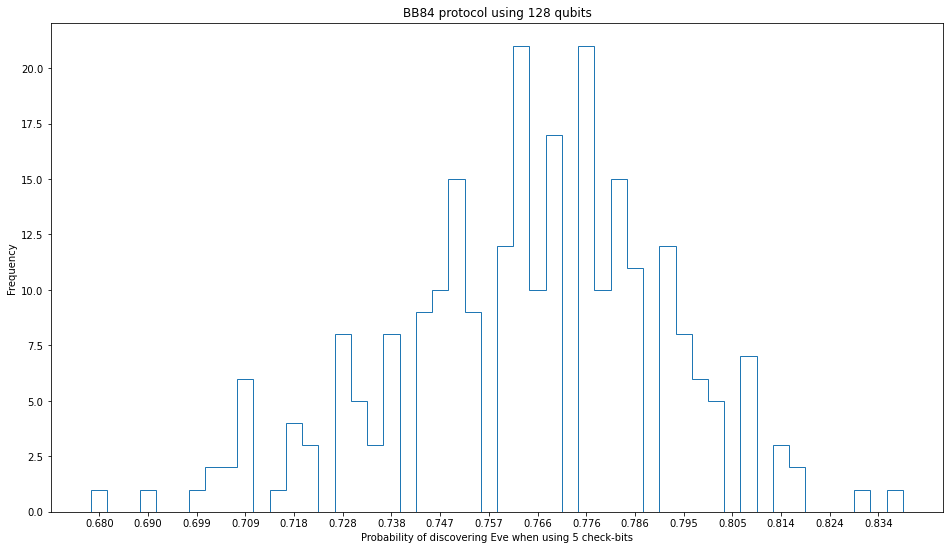

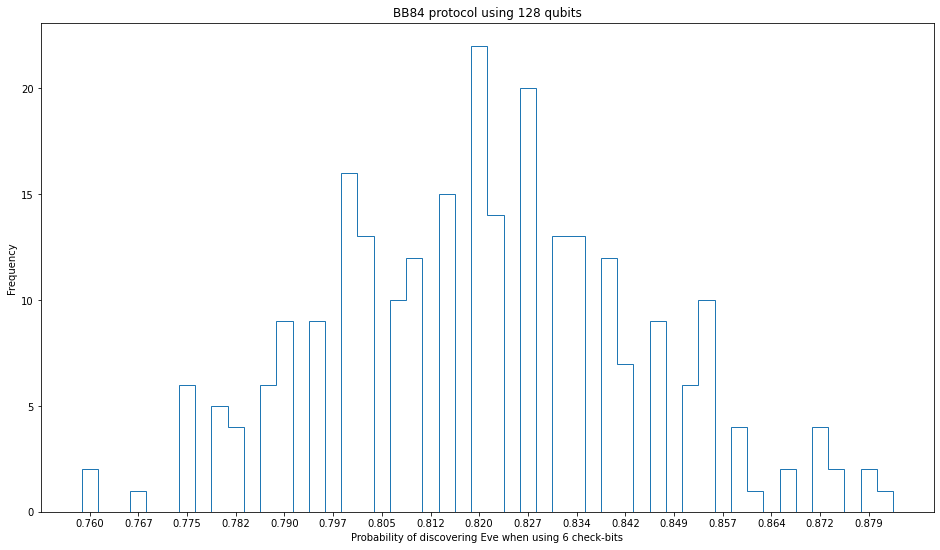

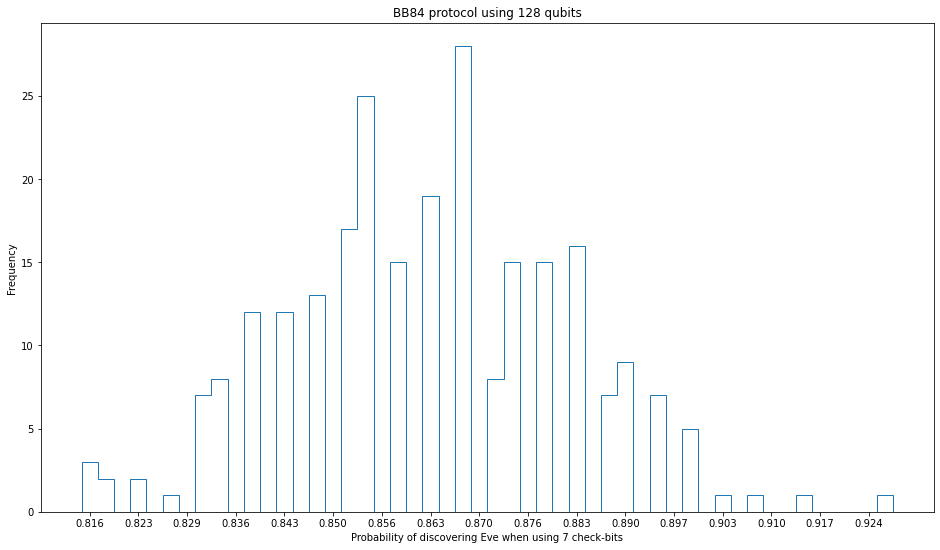

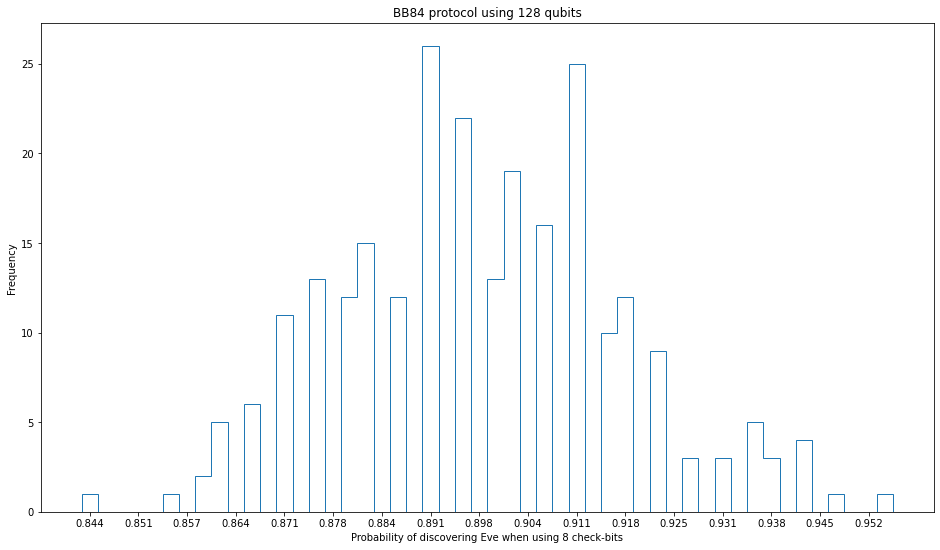

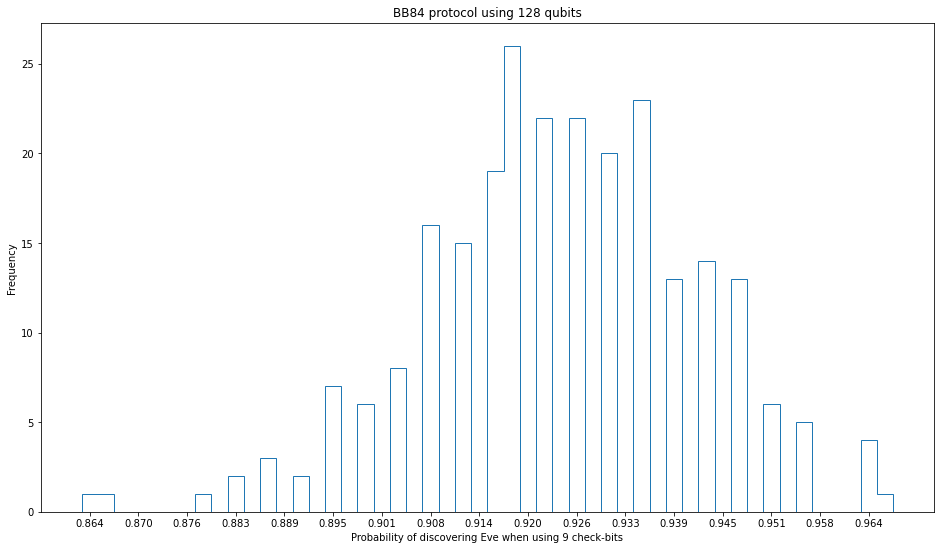

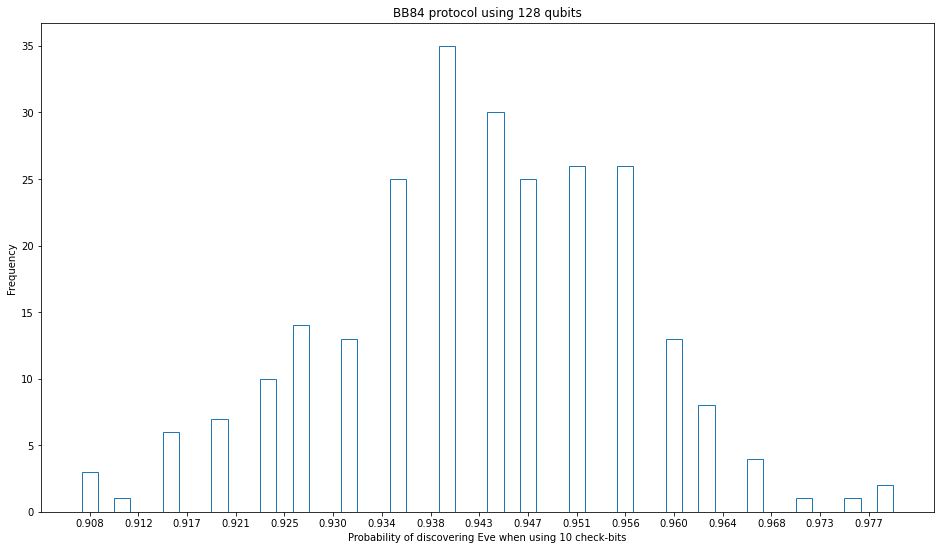

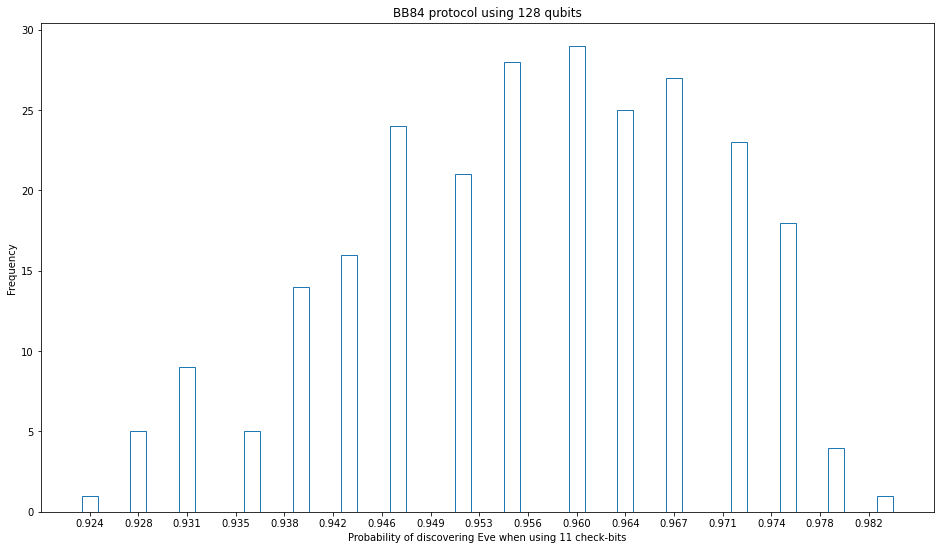

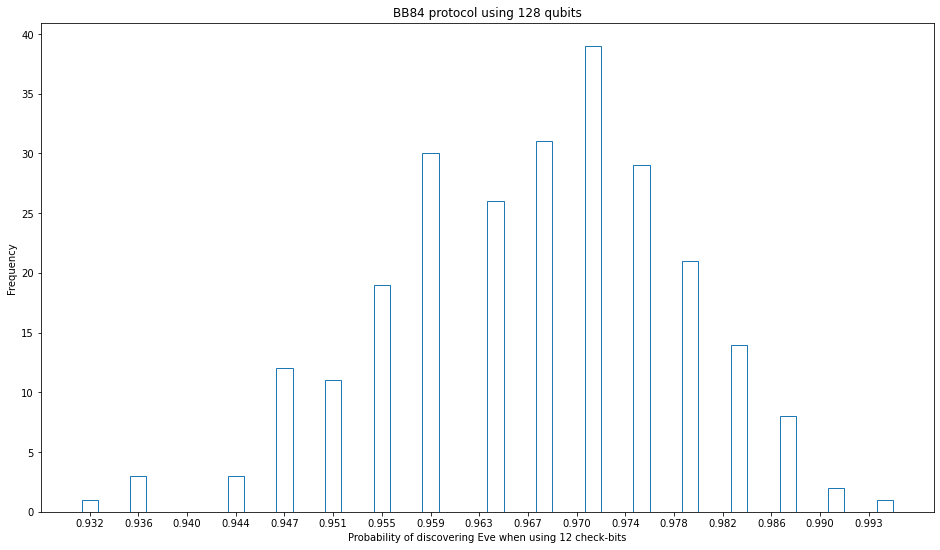

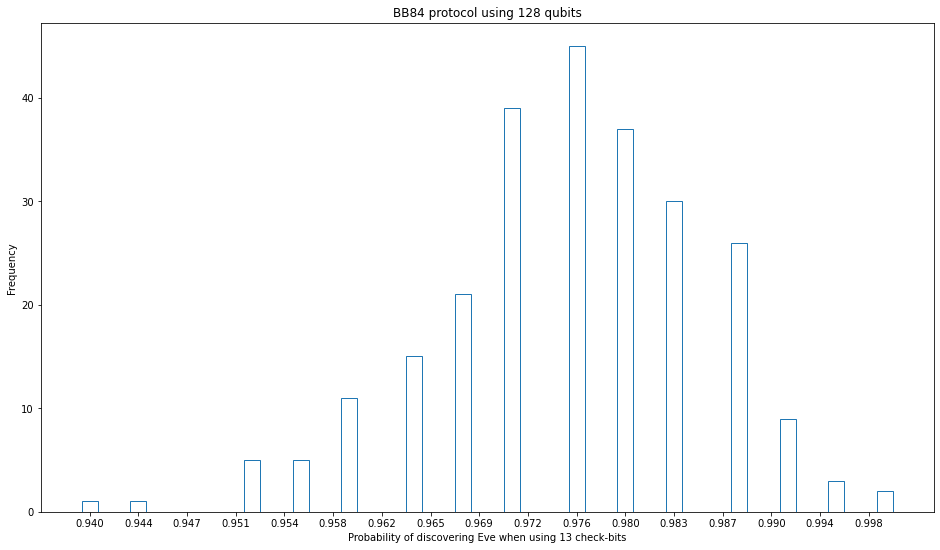

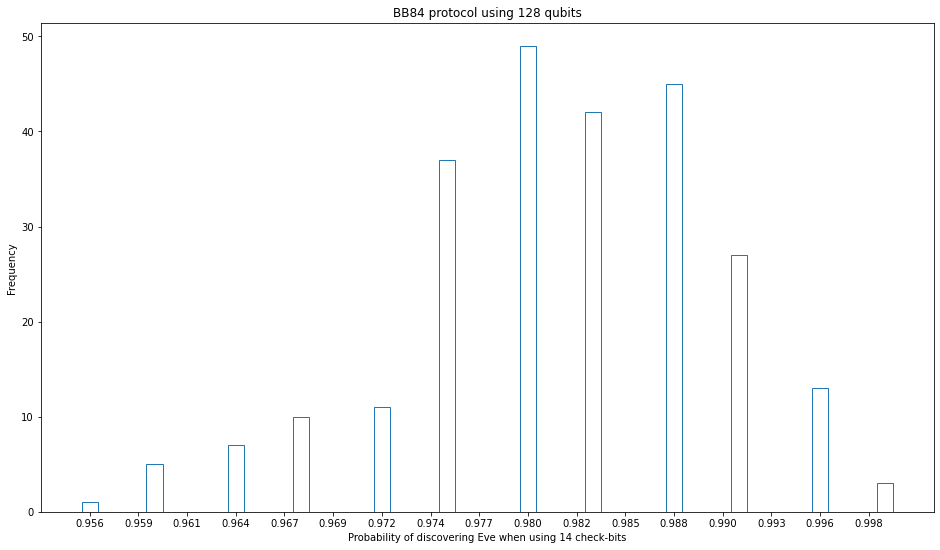

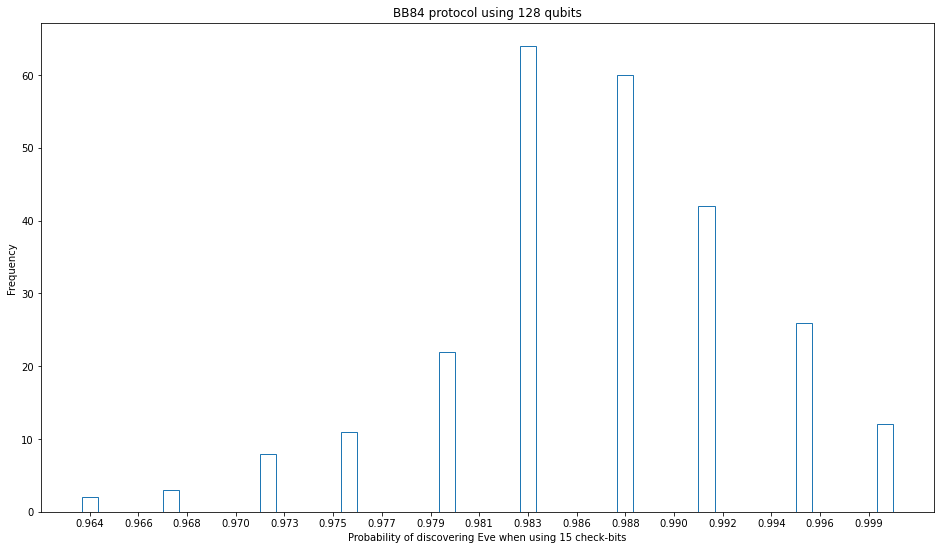

In [114]:
for qb in range(len(N)):
    count,val=[],[]
    plt.figure(num=qb,figsize=(16,9))
    count,val,_=plt.hist(dist[:,qb],bins=50,align='left',histtype='step' )
    ll=['%.3f' %a for a in val]
    plt.xticks(ticks=val[::3],labels=ll[::3])
    plt.xlabel('Probability of discovering Eve when using %i check-bits' %N[qb])
    plt.ylabel('Frequency')
#     plt.xlim(0.1,1)
    plt.title('BB84 protocol using %i qubits'%n)
    plt.savefig(outpath+'/'+'CloserLook_BB84-dist with %i check-bits'%N[qb],dpi=500)
    plt.show()
    plt.close()
  


## A few of them together

In [ ]:
plt.figure(figsize=(16,9))
start = 0
stop  = 1
step  = .05
bins=np.linspace(start, stop, num=250)

for qb in range(1,len(N),4):
  # count,val=[],[]  
  count,val,_=plt.hist(dist[:,qb],align='left',histtype='step',label='Probability using %i check-bits' %N[qb],bins=bins )
plt.xticks(np.arange(start, stop+step, step))
plt.xlabel('Probability of discovering Eve')
plt.ylabel('Frequency')
plt.xlim(0.05,1.0)
# plt.grid(axis='x')
plt.legend(bbox_to_anchor=(0.75, -0.07),ncol=2,shadow=True)
plt.title('BB84 protocol using %i qubits'%n)
plt.savefig(outpath+'/'+'BB84-dist-superimposed',dpi=500)
plt.show()

In [63]:
c=list(count)
maxprobindex=c.index(max(c))
val[maxprobindex]

0.9799599198396792

In [64]:
# print(p)
P=1-(.75)**N
print(P)
# print(np.e)

[0.25       0.4375     0.578125   0.68359375 0.76269531 0.82202148
 0.86651611 0.89988708 0.92491531 0.94368649 0.95776486 0.96832365
 0.97624274 0.98218205 0.98663654]


In [65]:
rse=np.sqrt((avrg-P)**2)
print('rse: \n',rse)
Error=avrg-P
print("Error: \n",Error)

abserr=np.abs(avrg-P)
print('abserr: \n',abserr)

print('Is root squared error same as absolute error?:\n', rse==abserr)

rse: 
 [6.24000000e-04 5.16000000e-04 2.00300000e-03 4.73750000e-04
 2.93668750e-03 6.13484375e-04 2.74011328e-03 7.35084961e-04
 9.26862793e-05 4.06485291e-04 5.16863968e-04 6.91647976e-04
 3.06735982e-04 7.00519865e-05 2.43461010e-04]
Error: 
 [-6.24000000e-04  5.16000000e-04  2.00300000e-03 -4.73750000e-04
  2.93668750e-03 -6.13484375e-04 -2.74011328e-03 -7.35084961e-04
  9.26862793e-05 -4.06485291e-04 -5.16863968e-04 -6.91647976e-04
 -3.06735982e-04 -7.00519865e-05  2.43461010e-04]
abserr: 
 [6.24000000e-04 5.16000000e-04 2.00300000e-03 4.73750000e-04
 2.93668750e-03 6.13484375e-04 2.74011328e-03 7.35084961e-04
 9.26862793e-05 4.06485291e-04 5.16863968e-04 6.91647976e-04
 3.06735982e-04 7.00519865e-05 2.43461010e-04]
Is root squared error same as absolute error?:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


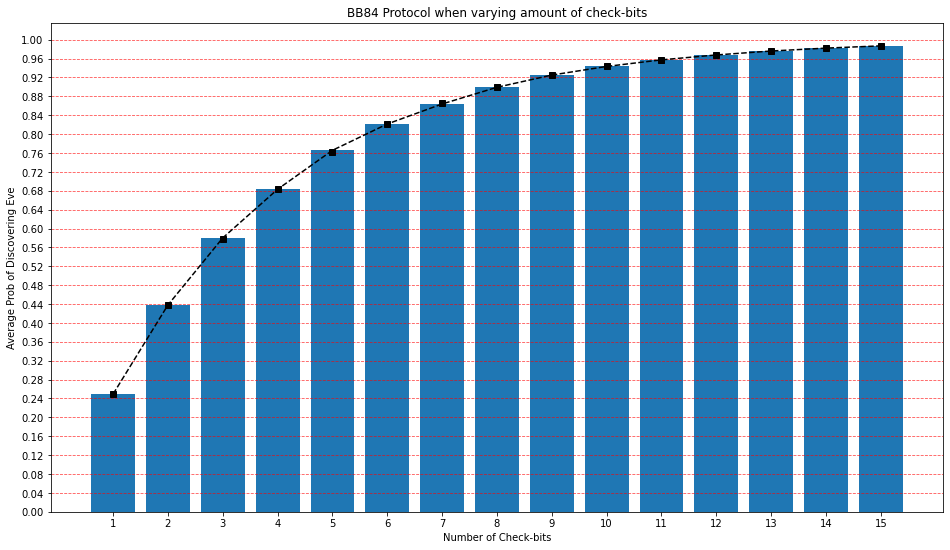

In [66]:
# for i in range(len(N)):
# count,val=[],[]
plt.figure(figsize=(16,9))
plt.bar(N,avrg)
plt.plot(N,avrg,'--k')
plt.plot(N,P,'sk')
plt.xticks(ticks=N)
plt.yticks(ticks=np.arange(start,stop+step,2*step))
plt.xlabel('Number of Check-bits')
plt.ylabel('Average Prob of Discovering Eve')
plt.title('BB84 Protocol when varying amount of check-bits')
plt.grid(axis='y',color='r',linestyle='--',alpha=.7)
plt.savefig(outpath+'/'+'BB84-prob-per-Check-bits',dpi=500)
plt.show()
